# Exploratory Analysis Report of Salary for the NBA 2022-23 Season

##### Ryan Hargreaves, August 2023

## Executive Summary:

Salary values within the NBA have a shocking range, from nearly 50 million USD per year down to just under 60 thousand USD per year.  The statistic most closely associated with a player's salary is their PPG (points per game), however the weighting is not equal across all positions. The Center position has the highest correlation with salary weighing in at .81.  Although the outrageous contracts such as Stephen Curry's 4 years 215 million dollar contract make news headlines, over half the league makes less than 4.5 million per year. As players have begun to emphasize their health and longevity, some players are able to continue their high level of play well in to their thirties, allowing them to sign multiple large contracts over their career. LeBron James is a blueprint example of this, but players like Stephen Curry and Kevin Durant are less athletically blessed players can keep up their high level of play as time goes on as well.  Any player looking to increase their salary should look to improve their scoring from any range, 2PT, 3PT, or FT. Efficiency has been the hallmark of the modern NBA, but salaries do not seem to reflect that as much as pure scoring is.  General Managers wanting to get the best value for their money will want to think about engaging in early negotations of extensions if a player is showing promising scoring talent.  As well, GMs can rest easier signing an "older" player to a big or longer contract, as it looks that on average players are able to continue to produce at a high level than in years prior, so long as the player remains relatively injury free.

## Table of Contents

 - #### Executive Summary
 - ####  Introduction
 - ####  Analysis
 - ####  Key Findings
 - ####  Conclusion
 - ####  Appendix

<h2 id="introduction">Introduction</h2>

The NBA has been making headlines for years with the enormous contracts that superstars such as LeBron James, Stephen Curry, and Kevin Durant have received.  Many of these contracts are in excess of 40 million USD per *year*, and thanks to the prosperity of the league the contracts only show signs of growing. Just this summer, Jaylen Brown signed a 5 year 304 million dollar contract, making him the highest paid player in the league annually. But while the star players watch their salaries skyrocket, what about the rest of the league?  This report aims to have a look at salaries across the league for the 2022-23 season and reveal insights such as who is getting paid the most/least, which positions are getting paid the most/least, which stats correlate the most with salary, and other things either interesting or important. These findings will help determine which statistics and qualities could be important for a player looking to increase their own paycheque, and which things general managers will want to monitor to try and either re-sign players for a team friendly deal, or trade for players who might overproduce based on the salary they currently have.

## Data Description

The data chosen for this analysis is the basic totals, per game, and salary statistics from the 2022-23 season. Two tables were taken from www.basketball-reference.com, and combined to create a table with a players total stats for the year, some created statistics for their 'per game' numbers, and finally their salary.

The dataset consists of 464 players, and it is commonly said that the league consists of roughly 450 players, so we feel confident in saying that our analysis is a large and accurate sample of the true population of players who saw the NBA floor in 2022-23.

## Data Exploration

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats

#this is a dummy df to get the cells to recognize the variabl
df = pd.DataFrame()

#dummy variables
salaryCorr = pd.DataFrame()
side_by_side = None
outliers = pd.DataFrame()

#run external script
%run -i ../scripts/SalaryAnalysis.py

#setting max columns
pd.set_option('display.max_columns', None)

# Set the display format to not use scientific notation
#pd.options.display.float_format = '{:.2f}'.format



### Univariate Analysis:


The first thing we want is to get some basic measure with which we can use to better understand the data as we explore it such as the mean, median, min, and max values of the data.

In [2]:
describe = df[['salary']].describe().applymap(format_with_commas).T
describe

,count,mean,std,min,25%,50%,75%,max
salary,464.00,"9,485,579.85","10,808,855.23","58,493.00","1,958,801.50","4,580,760.00","12,622,500.00","48,070,014.00"


We have 464 players in our dataset, with a mean salary of 9.48 million. Our lowest salary is 58 thousand, our maximum is a colossal 48 million, and our median salary rests at 4.58 million. For now we will withold any judgments on the data and proceed to keep these values in mind.

Something we might be immediately interested in is who were these minimum and maximum earners?

In [3]:
# Perform the query to filter the DataFrame based on salary condition and select columns
min_and_max = df.query('salary in [salary.min(), salary.max()]')[['Age', 'G', 'PPG', 'TRPG', 'APG', 'salary']]
# Format the 'salary' column with a dollar sign and commas for thousands
min_and_max['salary'] = min_and_max['salary'].apply(lambda x: '${:,}'.format(x))

# Print the formatted result
min_and_max.round(1)


,Age,G,PPG,TRPG,APG,salary
Player,,,,,,
Stephen Curry,34,56,29.4,6.1,6.3,"$48,070,014"
Stanley Umude,23,1,2.0,0.0,0.0,"$58,493"


Unsurprisingly the top salary is the household name Stephen Curry, coming in at 48 million a year. This is an insane amount of money for one year, but considering the player's popularity and ability it would make sense that he's the top earner in the league.  What is surprising is the lowest salary held by Stanley Umude at only 58 thousand dollars.  It's commonly believed that all professional athletes must be millionaires, and although we cannot speculate on Mr.Umude's total net worth, 58 thousand annually is a shockingly low number to be paid to play any sport at the highest level.

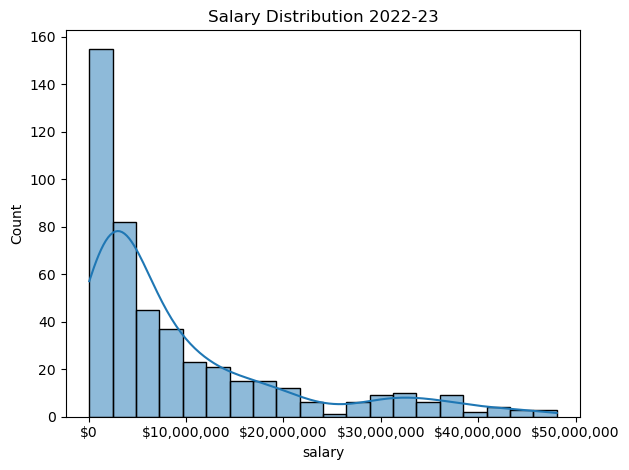

In [4]:
ax = sns.histplot(data = df, x='salary', kde=True, bins = 20)
ax.set(title='Salary Distribution 2022-23')
plt.ticklabel_format(style='plain')
# Format x-axis ticks with dollar signs and commas
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
# Adjust x-axis tick font size
ax.xaxis.set_tick_params(labelsize=10)  # Adjust the font size as needed
plt.tight_layout()
plt.show()

Our histogram of players' salaries shows a *considerably* right-skewed graph. Just by looking we can see roughly 200 players are earning less than about 5 million. After that it drops off fairly normally, but then has a little bump at just over 30 million and then back down.

Since the distribution is so heavily skewed right, a look at the median will perhaps be more insightful than the mean. We'll split the graphs into the lower 50% and the upper 50% and see what stands out.

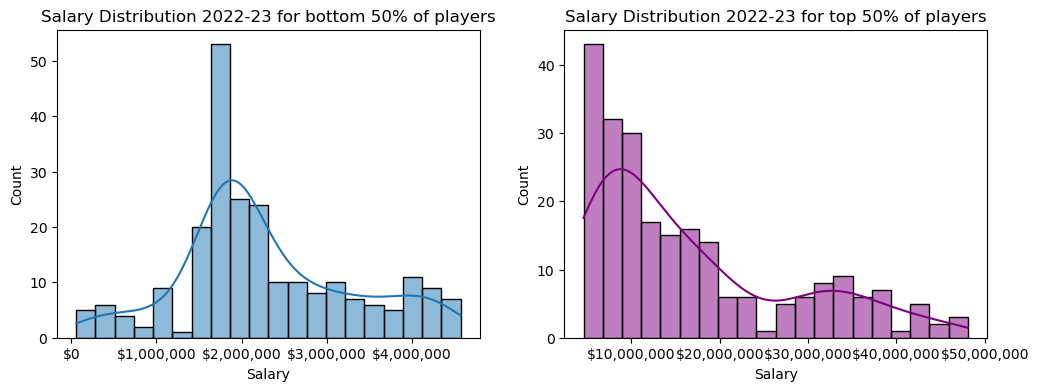

In [5]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'wspace': 0.2})

# Plot 1
medianLess = df.query('salary <= salary.median()')

ax1 = sns.histplot(data=medianLess, x='salary', kde=True, bins=20, ax=axs[0])
ax1.set(title='Salary Distribution 2022-23 for bottom 50% of players')
ax1.ticklabel_format(style='plain')
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
ax1.xaxis.set_tick_params(labelsize=10)
ax1.set_xlabel('Salary')
ax1.set_ylabel('Count')

# Plot 2
medianMore = df.query('salary > salary.median()')

ax2 = sns.histplot(data=medianMore, x='salary', kde=True, bins=20, ax=axs[1], color='purple')
ax2.set(title='Salary Distribution 2022-23 for top 50% of players')
ax2.ticklabel_format(style='plain')
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
ax2.xaxis.set_tick_params(labelsize=10)
ax2.set_xlabel('Salary')
ax2.set_ylabel('Count')

#plt.tight_layout()
plt.show()


These graphs gives us a better look at things.  It appears that a large portion of the players earned between 1.5-2.5 million in 2022-23. A quick look at the NBA Veteran Minimum contract shows that the floor is set at 953,000 for rookies, players with 10 years experience or more receive a minimum of 2.72 million, and everything inbetween for players with years of experience between that. This suggests that a lot of players are making close to their minimum based on what they can be paid by the league.

Another large portion of the players seem to have made just short of &#36;10 million this year. From there we see a normal drop off and then a dip back up at &#36;30-35 million.  The wealth certainly seems to be distributed towards the top players in the league.

In [6]:
# Calculate the mean salary for each position and sort by descending mean salary
positionMean = df[['salary', 'Pos']].groupby(['Pos']).mean().sort_values(by='salary', ascending=False).round()
# Rename the 'salary' column to 'Mean Salary by Position'
positionMean.rename(columns={'salary': 'Mean Salary by Position'}, inplace=True)
# Format mean salary values as currency with commas
positionMean['Mean Salary by Position'] = positionMean['Mean Salary by Position'].apply(lambda x: f'${int(x):,}'.format(x))
# Apply center alignment styling to the mean salary DataFrame
positionMean = positionMean.style.set_properties(**{'text-align': 'center'})

# Calculate the median salary for each position and sort by descending median salary
positionMedian = df[['salary', 'Pos']].groupby(['Pos']).median().sort_values(by='salary', ascending=False).round()
# Rename the 'salary' column to 'Median Salary by Position'
positionMedian.rename(columns={'salary': 'Median Salary by Position'}, inplace=True)
# Format median salary values as currency with commas
positionMedian['Median Salary by Position'] = positionMedian['Median Salary by Position'].apply(lambda x: f'${int(x):,}'.format(x))
# Apply center alignment styling to the median salary DataFrame
positionMedian = positionMedian.style.set_properties(**{'text-align': 'center'})

side_by_side(positionMean, positionMedian)


,Mean Salary by Position
Pos,
PG,"$12,183,395"
PF,"$9,403,577"
C,"$9,338,676"
SG,"$8,495,827"
SF,"$8,278,663"
,Median Salary by Position
Pos,
PG,"$5,853,659"
PF,"$4,866,840"


Finally we'll create a boxplot for the salaries to get a different look at the range of salaries, along with a quick observation of any possible outliers.

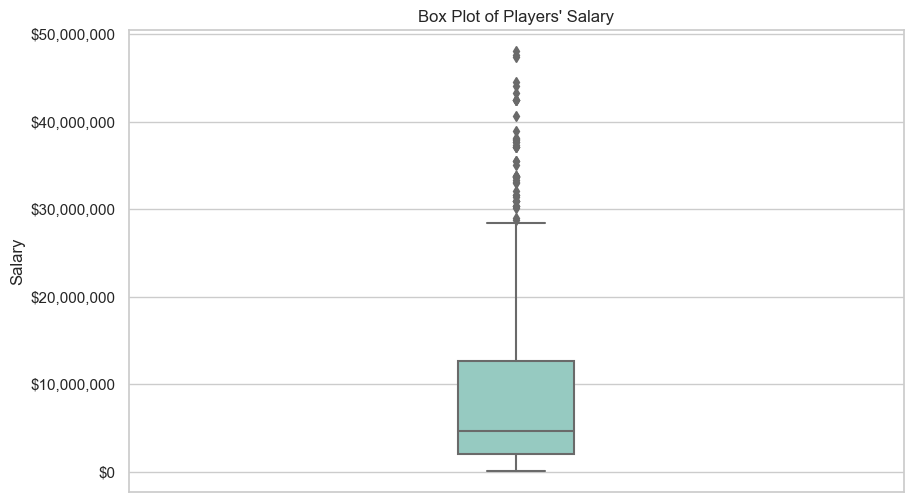

In [7]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")   # Set the style of the plot

# Create the box plot
ax = sns.boxplot(y="salary", data=df, palette="Set3", width=0.15)

# Add labels and title
plt.ylabel("Salary")
plt.title("Box Plot of Players' Salary")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"${int(x):,}"))


# Show the plot
plt.show()


The boxplot identifies quite a few outliers actually. Later on we'll calculate what the exact value for an outlier has to exceed to qualify, but for now the boxplot shows that salaries larger than roughly \$28 million are outliers.  This makes sense, we can guess that most of those outlier salaries belong to star players, who are the exception not the norm.

### Bivariate and Multivariate Analysis:

Now that we've looked at the distribution of salary, we are interested in what statistics associate with salary the most. We can visualize this with a correlation matrix heatmap to get an idea of how hot or cold each stat is with regards to salary.

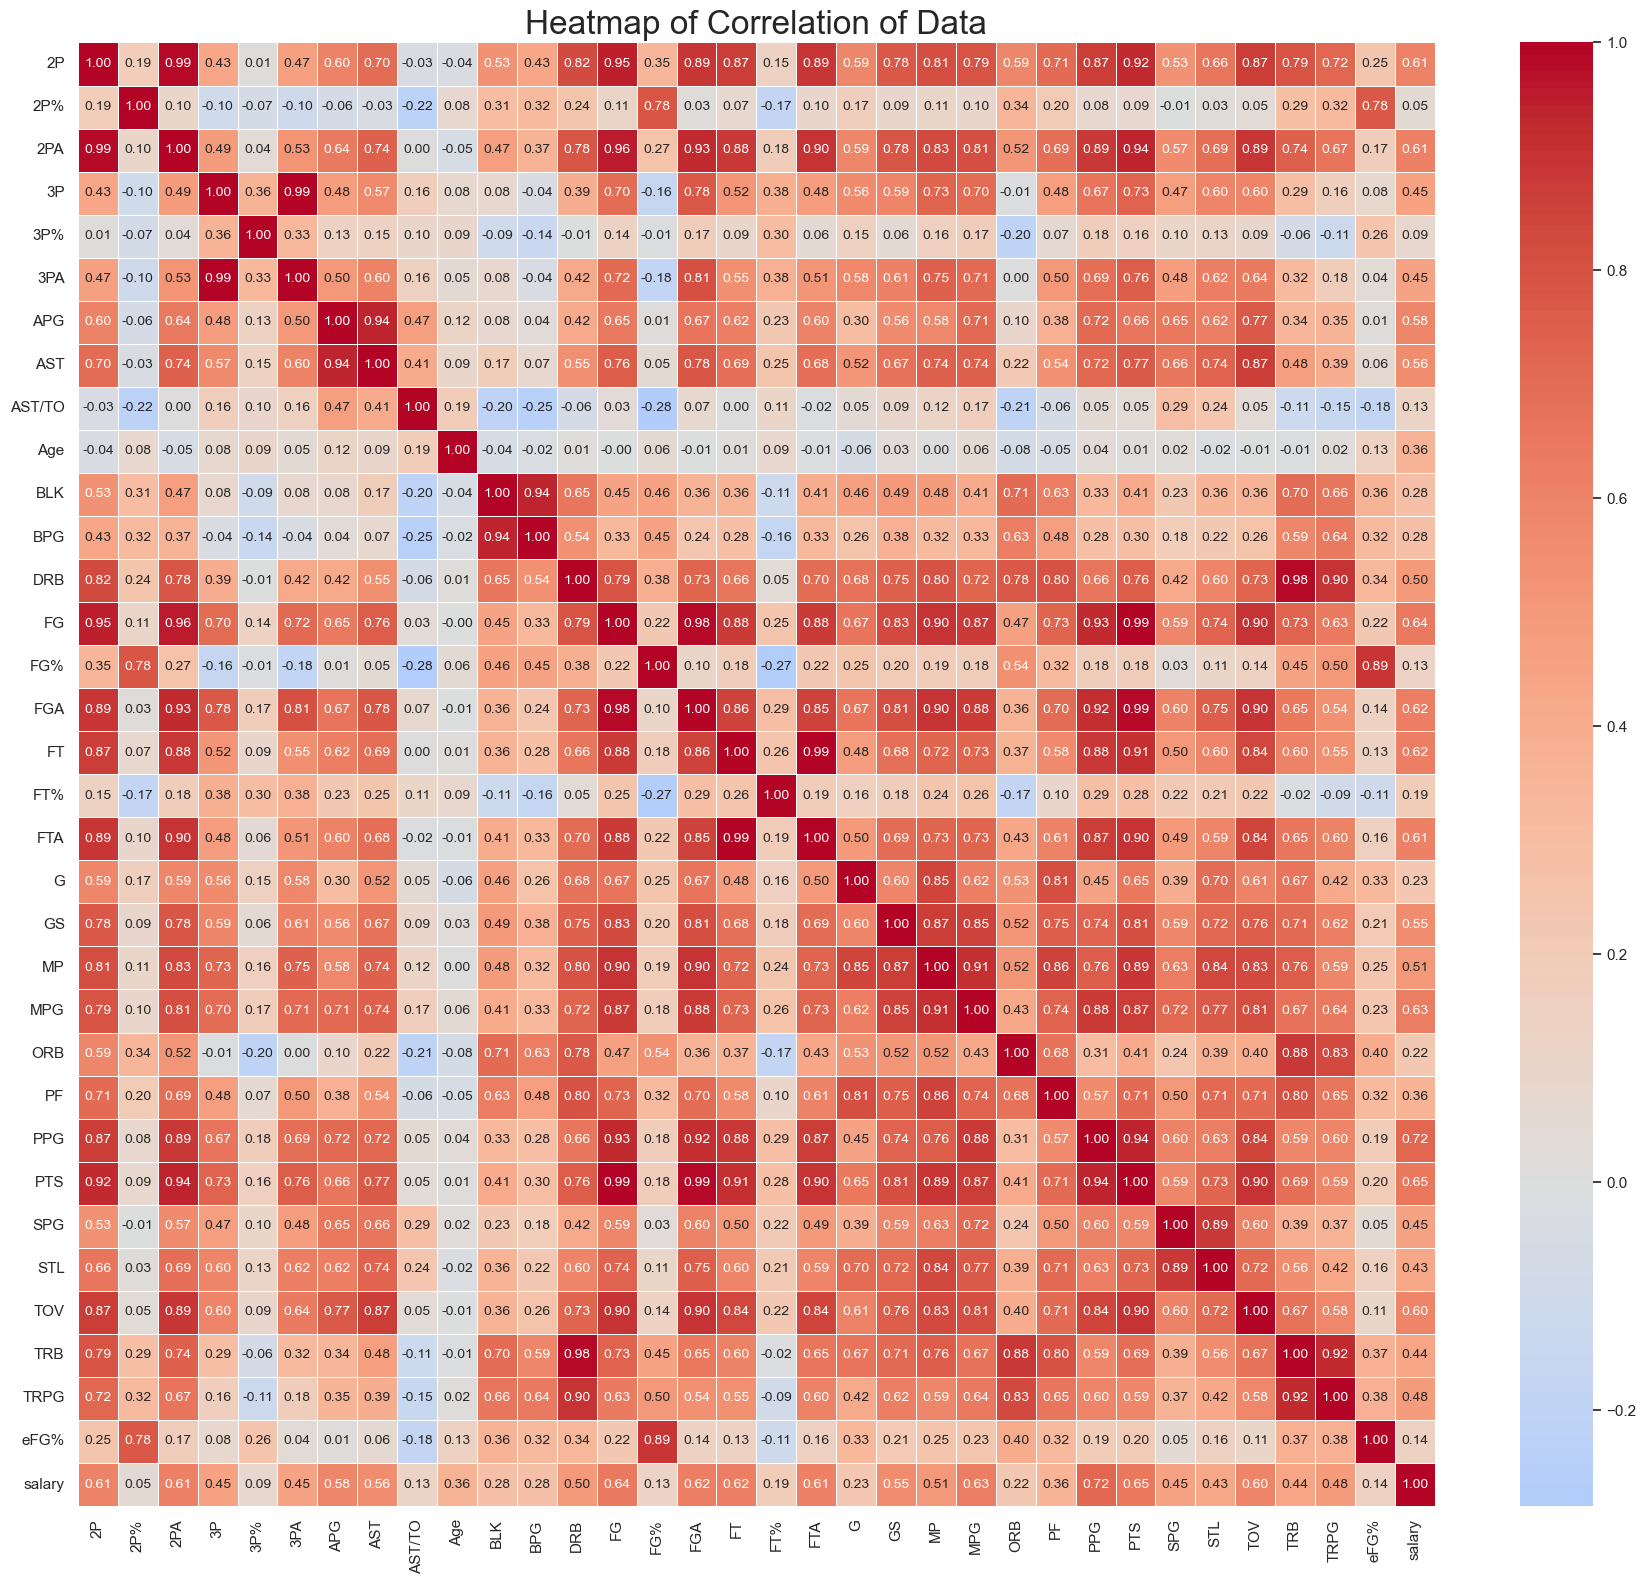

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.drop(columns=['dollarPerMinute','dollarPerFG','dollarPerPoint'])
correlation_matrix = correlation_matrix.corr(numeric_only=True)

plt.figure(figsize=(18, 16))  # Set the figure size

# Create the heatmap of correlation matrix with improved layout
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            linewidths=0.5, annot_kws={"size": 10})

# Set title
plt.title("Heatmap of Correlation of Data", size=24)
plt.tight_layout()  # Improve layout
plt.show()



Looking along the salary row shows us that Points Per Game (PPG) has the highest value, and the lowest value is 2 Point Percentage (2P%). Let's have a look at a scatterplot of these two values vs salary, then we can grab all the values as a list for further inspection.

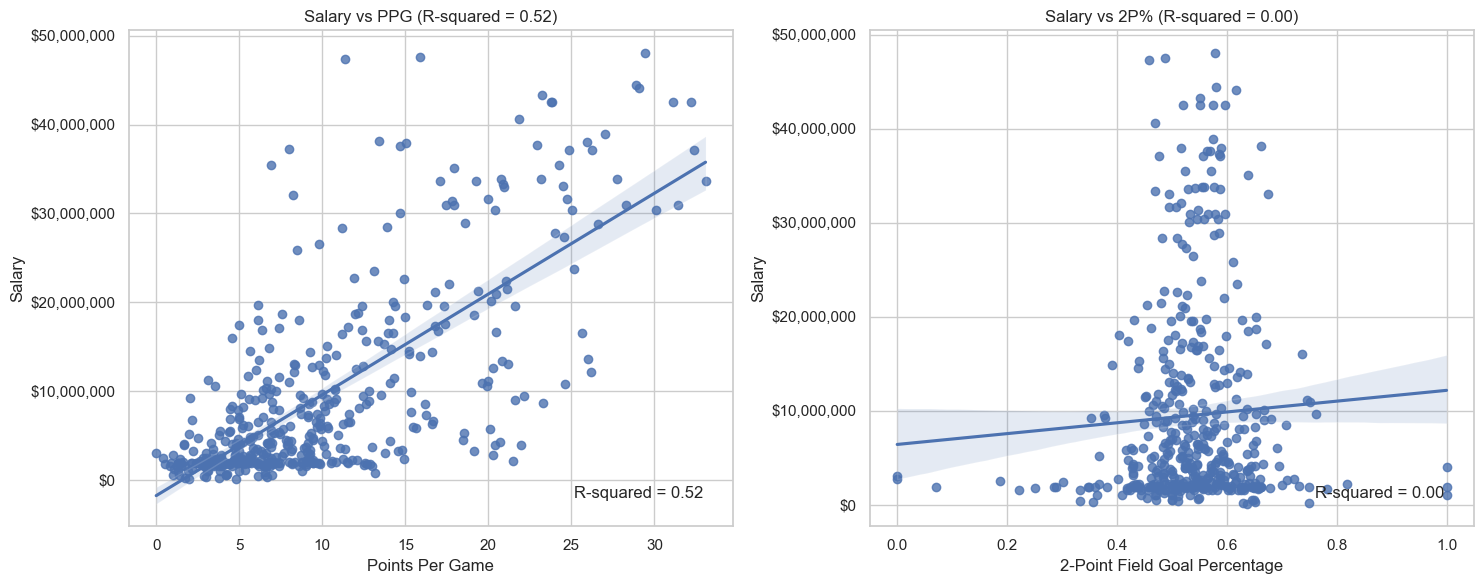

In [9]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Scatter Plot of Salary vs PPG
sns.set(style="whitegrid")
scatter_plot1 = sns.regplot(x="PPG", y="salary", data=df, ax=axes[0])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['PPG'], df['salary'])
r_squared = r_value ** 2
axes[0].set_xlabel("Points Per Game")
axes[0].set_ylabel("Salary")
axes[0].set_title("Salary vs PPG (R-squared = {:.2f})".format(r_squared))
ax = scatter_plot1.axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
axes[0].text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax.transAxes, fontsize=12,
             verticalalignment='bottom', horizontalalignment='right')

# Plot 2: Scatter Plot of Salary vs 2P%

TwoP = df[df['2P%'].notna()]

sns.set(style="whitegrid")
scatter_plot2 = sns.regplot(x="2P%", y="salary", data=TwoP, ax=axes[1])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(TwoP['2P%'], TwoP['salary'])
r_squared = r_value ** 2
axes[1].set_xlabel("2-Point Field Goal Percentage")
axes[1].set_ylabel("Salary")
axes[1].set_title("Salary vs 2P% (R-squared = {:.2f})".format(r_squared))
ax = scatter_plot2.axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
axes[1].text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax.transAxes, fontsize=12,
             verticalalignment='bottom', horizontalalignment='right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Looking at the scatterplot of salary vs ppg we can see a moderate, positive R squared value of 0.52. This means roughly half of salary is explained by PPG.  Meanwhile looking at salary vs 2P%, we have an R squared of 0, which means 2P% explains nothing about one's salary. Of note however, 2P% seems to be pretty evenly distributed around about 55%, perhaps meaning that you need to shoot at least that efficient if you want to stay on the floor.

Now that we've looked at the highest and lowest values in the heatmap, we'll grab a list of all the stats with relation to salary and inspect it.

In [10]:
# Get the top 5 correlations (descending) from the 'All' column
head = salaryCorr[['All']].head(10)
# Rename the 'All' column for the top 5 correlations
head.rename(columns={'All': 'Top 10 Correlation of Salary Descending'}, inplace=True)
# Apply styling to center align the data in the top 5 correlations
head = head.style.set_properties(**{'text-align': 'center'})

# Get the bottom 5 correlations (ascending) from the 'All' column
bottom5 = salaryCorr[['All']].tail(10).sort_values(by='All', ascending=True)
# Rename the 'All' column for the bottom 5 correlations
bottom5.rename(columns={'All': 'Top 10 Correlation of Salary Ascending'}, inplace=True)
# Apply styling to center align the data in the bottom 5 correlations
bottom5 = bottom5.style.set_properties(**{'text-align': 'center'})


side_by_side(head,bottom5)

,Top 10 Correlation of Salary Descending
PPG,0.722858
PTS,0.652559
FG,0.643683
MPG,0.630499
FGA,0.623244
FT,0.621678
FTA,0.613507
2PA,0.610352
2P,0.608308
TOV,0.595574


The top 10 stats most correlated with scoring are all to do with scoring, scoring attempts, and oddly turnovers.  An explanation for turnovers being so high is that the players who make and score the most have the ball in their hands most of the time, and therefore the more often you have the ball the more you'll turn over the ball.  If the ball isn't in your hands you can't score, so it just comes with the territory.

Conversely, the bottom 10 stats consist of 5 shooting effiency stats, blocks, offensive rebounds, assist to turnover ratio, and interestingly enough number of games played. Since player's contracts are guaranteed the games played stat is probably offset by players who were injured and still received large paycheques from conracts they signed previously.

The immediate impression we can take away that with regards to salary is it doesn't matter how efficent you are, it's about how much pure volume you are able to score.

While it's clear that pure scoring volume is the most important thing where salary is involved across the league, it's worth investigating if anything changes per position.  For example, a Point Guard has a vastly different responsiblity on the floor than the Center does.  We can expect scoring to stay constant amongst positions, but we might suspect that assists could crack the top 5 for Point Guards, and perhaps blocks for Centers.

**Top 5 Stats correlated with Salary Descending**

In [11]:
side_by_side(salaryCorr[['PG']].nlargest(5, 'PG'),
             salaryCorr[['SG']].nlargest(5, 'SG'),
             salaryCorr[['SF']].nlargest(5, 'SF'),
             salaryCorr[['PF']].nlargest(5, 'PF'), 
             salaryCorr[['C']].nlargest(5, 'C'))

,PG
PPG,0.663703
PTS,0.624945
FG,0.617011
APG,0.611871
MPG,0.608759
,SG
PPG,0.707760
PTS,0.660861
FGA,0.651549
FG,0.650419


Indeed, the criteria for financial success in the NBA *does* differ per position. Of course PPG stays at the top, but there are differences in stats and also rankings per position worth noting

- **Point Guards** Assists per Game (APG) is the first new stat and it comes in at 4th, like we suspected it might. This means that while the era of the "score first" point guard is indeed here, it's beneficial for Point Guards to find teammates who are able to generate them assists.

- **Shooting Guards** as expected are paid for their shooting. Klay Thompson once said "They pay me to shoot", and he indeed wasn't lying. Field Goal attempts are ranked 3rd above, even Field Goals made. Finally, the number of 3 point shot made rounds out the top 5, starting to show some of the importance of the 3 point shot in regards to salary. Intuitively this makes sense for the position, a shooting guard should be expected to score from all distances.

- **Small Forwards** have APG ranked 2nd, which is even higher than the PG position, that's interesting for sure. Back in the 90s Scottie Pippen pioneered the "Point Forward" position with Michael Jordan's Chicago Bulls, and it seems the position has evolved even more to the current day. Perhaps it is expected for the PG to be able to create assists, and in SFs it's financialy rewarded because it's a rarer skill at the position.

- **Power Forwards** also have APG in second. It's interesting to see APG be Top 5 in 3 of the 5 positions, yet absent in the top 10 for when ranking all positions.

- **Center** contains all the stats from the league wide top 5, albeit in a different order. Notably however is the whopping 0.81 correlation that PPG has at the Center position, meaning that this position is all about scoring no matter how.

### Outlier Detection:

Recall our boxplot from the univariate analysis section.

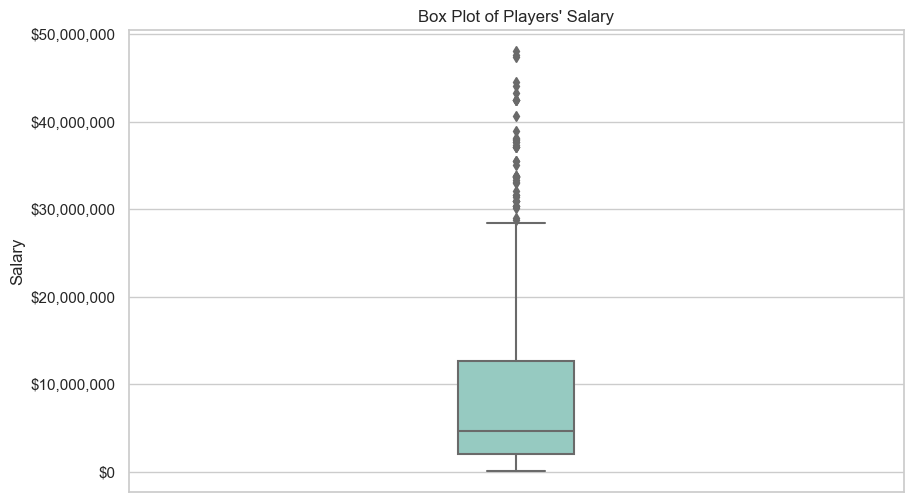

In [12]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")   # Set the style of the plot

# Create the box plot
ax = sns.boxplot(y="salary", data=df, palette="Set3", width=0.15)

# Add labels and title
plt.ylabel("Salary")
plt.title("Box Plot of Players' Salary")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"${int(x):,}"))

# Show the plot
plt.show()


This graph indicated that any salary larger than roughly \$28 million was an outlier. Here we will computer the outlier value for ourselves and compare it, along with have a look at any and all players that are considered outliers.

In [55]:
#latex calculation perhaps?
print(f'${outlier_calc:,.2f}')

$41,912,145.54


Our calculation of an outlier has a much higher value, putting the threshold at a salary greater than \$41.9 million.  Intuitively that probably makes more sense, since the distribution showed us there was actually a jump in the number of salaries in the \$30 million range.

Lets look at the players that have salaries considered to be outliers and see if there's anything we can identify about them.

In [54]:
outlier_players = df2.query('salary > @outlier_calc')
outlier_players.loc[:, ['Tm', 'Pos', 'Age', 'salary', 'G', 'MPG', 'PPG', '2P%','3P%','eFG%', 'FG%', 'FT%', 'AST/TO','APG', 'TRPG']].round(2)

,Tm,Pos,Age,salary,G,MPG,PPG,2P%,3P%,eFG%,FG%,FT%,AST/TO,APG,TRPG
Player,,,,,,,,,,,,,,,
Giannis Antetokounmpo,MIL,PF,28,42492492,63,32.13,31.10,0.60,0.28,0.57,0.55,0.64,1.46,5.70,11.78
Bradley Beal,WAS,SG,29,43279250,50,33.46,23.20,0.55,0.36,0.55,0.51,0.84,1.87,5.42,3.92
Stephen Curry,GSW,PG,34,48070014,56,34.66,29.43,0.58,0.43,0.61,0.49,0.92,1.97,6.29,6.09
Kevin Durant,TOT,PF,34,44119845,47,35.57,29.06,0.62,0.40,0.61,0.56,0.92,1.51,5.00,6.66
Paul George,LAC,SG,32,42492492,56,34.62,23.79,0.52,0.37,0.54,0.46,0.87,1.64,5.14,6.11
LeBron James,LAL,PF,38,44474988,55,35.53,28.91,0.58,0.32,0.55,0.50,0.77,2.11,6.82,8.31
Kawhi Leonard,LAC,SF,31,42492492,52,33.62,23.83,0.55,0.42,0.57,0.51,0.87,2.32,3.92,6.50
Damian Lillard,POR,PG,32,42492492,58,36.33,32.17,0.57,0.37,0.56,0.46,0.91,2.23,7.33,4.78
John Wall,LAC,PG,32,47345760,34,22.21,11.35,0.46,0.30,0.46,0.41,0.68,2.22,5.24,2.71


Some notable observations of the outliers:
- Of the 10 outliers, 4 of them are point guards. This helps explain why the point guard mean salary is so high compared to the other positions. 
- 8 players are over the age of 30, with LeBron James being the oldest at 38. This is encouraging for younger players hoping to be able to earn as they age over time.
- 2 of these players, Russell Westbrook and John Wall, have a much lower PPG than the others. They are both over 30, so it's possible that these players are near the end of a max contract they signed back in their "prime", or perhaps they got injured and haven't been able to play relative to their earnings.
- There are no Centers in the list of outliers. The Center position had the 3rd highest mean salary and the 4th highest median salary.

### Categorical Variables:
Use visually appealing bar charts or pie charts to demonstrate the distribution of categorical variables and any relationships between them.

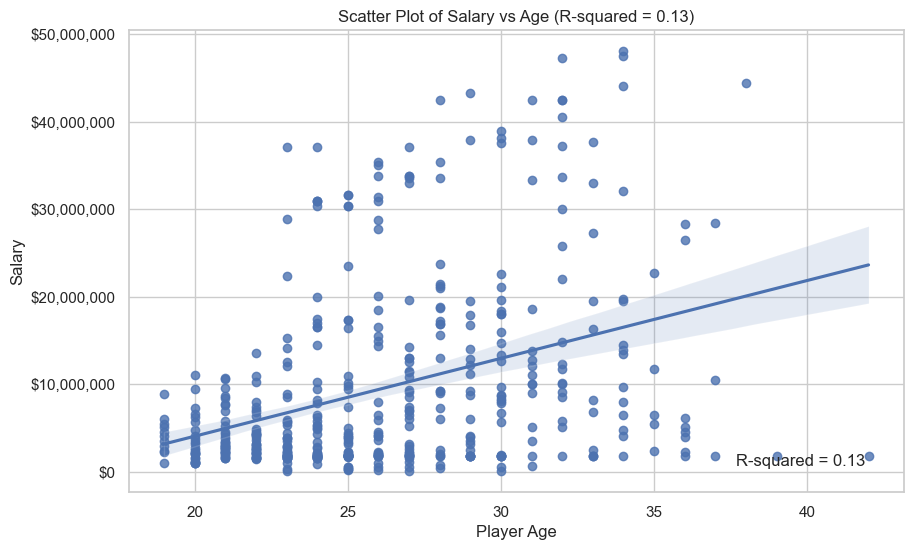

In [15]:
# Set the figure size and style of the plot
plt.figure(figsize=(10, 6))  
sns.set(style="whitegrid")   
# Create the scatter plot
scatter_plot = sns.regplot(x="Age", y="salary", data=df)
# Calculate the linear regression parameters
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['Age'], df['salary'])
r_squared = r_value ** 2
# Add labels and title
plt.xlabel("Player Age")
plt.ylabel("Salary")
plt.title("Scatter Plot of Salary vs Age (R-squared = {:.2f})".format(r_squared))
# Customize legend
ax = scatter_plot.axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
# Display R-squared value on the plot
plt.text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment='right')
# Show the plot
plt.show()

There is a weaker than expected relationship between salary and a player's age.  Although players younger than about 23 struggled to break the $10 million a year mark, at about 24 salary takes off and doesn't drop until much later (after 37 or so). This can be explained through a look at how NBA rookie contracts work.  Players selected in the first round of the NBA draft are signed to standard deals that are 2 years long, with the team retaining the option to extend that rookie contract for up to an additional 2 years if they wish.  After that, players and teams are able to engage in contract extensions, which allow the player to re-sign a player up to 35 percent of the salary cap with 8 percent escalation in each subsequent year.  This explains the salary take off at about 24, players are done with their rookie contract and the rising stars worth big extensions get them signed and see an explosion in salary.

From that point on salaries are tied to the league's salary cap as a percentage and/or up to 105% of the player's salary for the previous season. This means that players who are able to keep up their level of play later in to their thirties can continue to receive increasing contract offers and extensions. It seems that age has less of a bearing on salary than perhaps it used to. 

In [16]:
max_salary_indices = df.groupby('Age')['salary'].idxmax()
max = df.loc[max_salary_indices, ['Age', 'salary', 'Tm']]
max['salary'] = max['salary'].apply(lambda x:'{:,}'.format(x))

min_salary_indices = df.groupby('Age')['salary'].idxmin()
min = df.loc[min_salary_indices, ['Age', 'salary','Tm']]
min['salary'] = min['salary'].apply(lambda x:'{:,}'.format(x))

side_by_side(min, max)

,Age,salary,Tm
Player,,,
Max Christie,19,"1,017,781",LAL
Jaden Hardy,20,"1,017,781",DAL
Brandon Boston Jr.,21,"1,563,518",LAC
Christian Koloko,22,"1,500,000",TOR
Stanley Umude,23,"58,493",DET
Jordan Goodwin,24,"900,000",WAS
Anthony Lamb,25,"253,254",GSW
Alize Johnson,26,"192,293",SAS
Xavier Cooks,27,"140,384",WAS


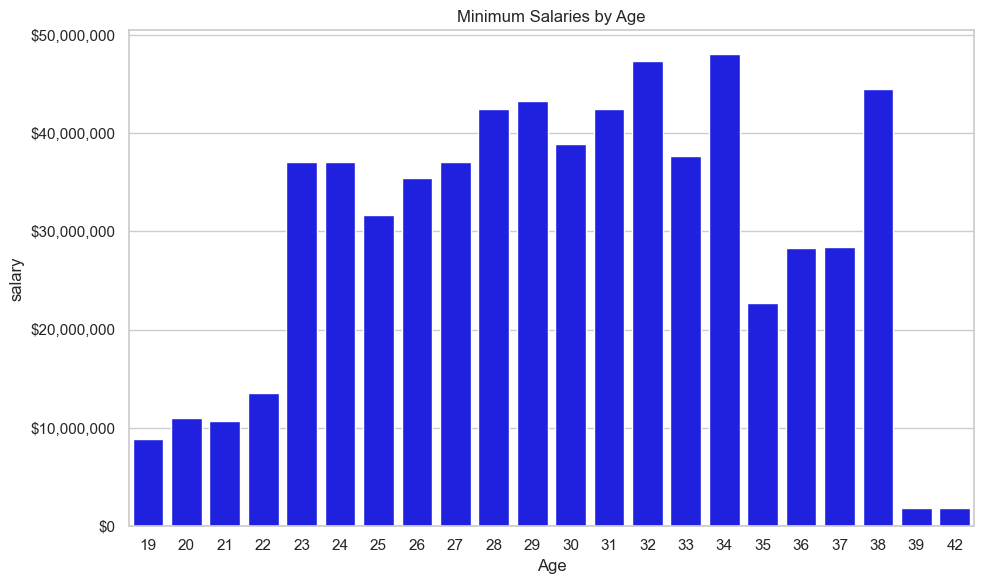

In [17]:
test_max = df.loc[max_salary_indices, ['Age', 'salary']]

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

sal_plot = sns.barplot(data=test_max, x='Age', y='salary', color='blue')

# Customize y-axis tick formatting as dollar values
def dollar_format(x, pos):
    return '${:,.0f}'.format(x)

sal_plot.yaxis.set_major_formatter(ticker.FuncFormatter(dollar_format))

plt.title('Minimum Salaries by Age')
plt.tight_layout()
plt.show()

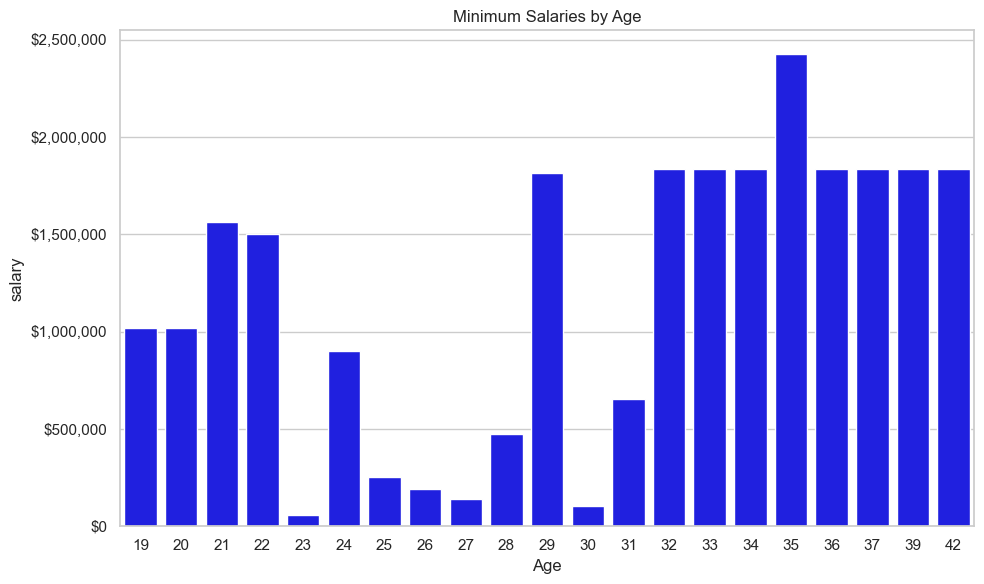

In [18]:
test_min = df.loc[min_salary_indices, ['Age', 'salary']]
test_min = test_min[test_min['Age'] != 38]

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

sal_plot = sns.barplot(data=test_min, x='Age', y='salary', color='blue')

# Customize y-axis tick formatting as dollar values
def dollar_format(x, pos):
    return '${:,.0f}'.format(x)

sal_plot.yaxis.set_major_formatter(ticker.FuncFormatter(dollar_format))

plt.title('Minimum Salaries by Age')
plt.tight_layout()
plt.show()

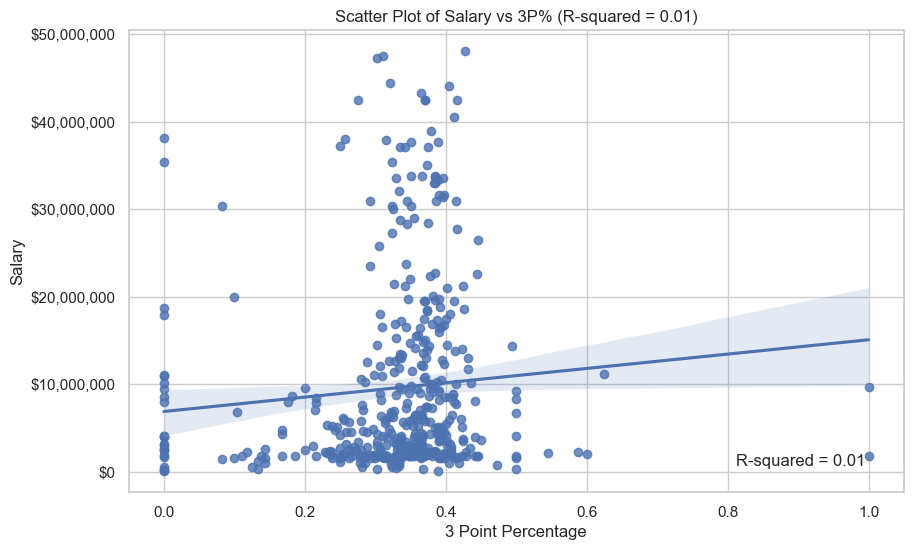

In [19]:
result = df[df['3P%'].notna()]

# Set the figure size and style of the plot
plt.figure(figsize=(10, 6))  
sns.set(style="whitegrid")   
# Create the scatter plot
scatter_plot = sns.regplot(x="3P%", y="salary", data=result)
# Calculate the linear regression parameters
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(result['3P%'], result['salary'])
r_squared = r_value ** 2
# Add labels and title
plt.xlabel("3 Point Percentage")
plt.ylabel("Salary")
plt.title("Scatter Plot of Salary vs 3P% (R-squared = {:.2f})".format(r_squared))
# Customize legend
ax = scatter_plot.axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
# Display R-squared value on the plot
plt.text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment='right')
# Show the plot
plt.show()

Surprisingly, 3 point percentage has almost no relationship with salary.  The mean 3P% seems to be about 33%, and really has no bearing on how much a player gets paid. Considering the emphasis on 3 point shooting we might have expected salary to be tied closer to 3P%, but clearly this is not the case.

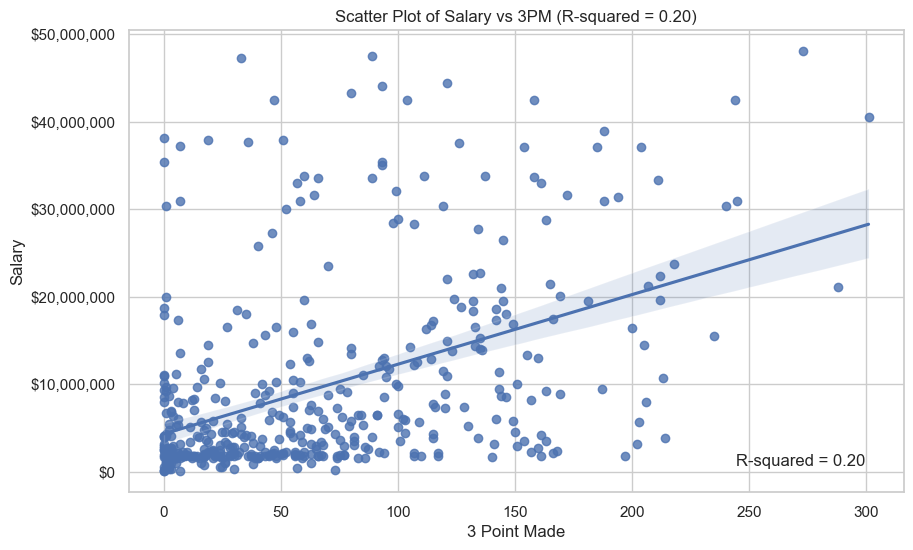

In [20]:
result = df[df['3P%'].notna()]

# Set the figure size and style of the plot
plt.figure(figsize=(10, 6))  
sns.set(style="whitegrid")   
# Create the scatter plot
scatter_plot = sns.regplot(x="3P", y="salary", data=result)
# Calculate the linear regression parameters
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(result['3P'], result['salary'])
r_squared = r_value ** 2
# Add labels and title
plt.xlabel("3 Point Made")
plt.ylabel("Salary")
plt.title("Scatter Plot of Salary vs 3PM (R-squared = {:.2f})".format(r_squared))
# Customize legend
ax = scatter_plot.axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
# Display R-squared value on the plot
plt.text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment='right')
# Show the plot
plt.show()

Looking at the total number of 3 point shots made has a closer relationship with salary. What this could suggest is that it matters less if you're an accurate shooter who doesn't shoot often, versus being less efficient but letting it fly.  While 3 point shooting has been overall more emphasized in the league, it's probably safe to assume that the Center position is asked to shoot it less than the PG and SG positions are. It might be worth investigating this relationship by each position to see if there's more to see.

## Key Findings

Summarize the most critical insights from your analysis. Emphasize how these findings relate to the initial research questions and their implications for decision-making.

There were a number of important results in this analysis.  It was shocking to see that some players are making as low as 60,000 a year playing professional sports in the most talented basketball league in the world. As well, the median salaries being roughly half as much as the mean salaries (thanks to the outlier contracts) provided greater understanding that while earning millions per year put you in the top earners in the world, the star players are making more in one year than most players in the league will earn in their entire career.

It was interesting to see that age played less of a role in determining salary than perhaps was expected. It seems that players are signing big contracts even into their thirties, meaning that star players in the future may be able to sign 2 or even 3 max contracts over the course of their career if they are able to maintain their skills.  Teams are not shying away from signing players to long contracts later in their career as it seems star player's longevity in the league is increasing.

Points Per Game had the strongest correlation with scoring, proving that if you want to get paid you need to score. In fact, assists per game was the only stat in the top 5 correlation in any position that wasn't related to scoring. The one exception to that was total turn overs for the point guard, but that can be attributed to the fact that those who have the ball the most will just happen to turn the ball over as time goes on. 

NBA analysts are very focused on efficiency these days, so it was surprising to see that none of the percentage based efficiency stats like FG%, FT%, or 3P% seemed to have much correlation with a players' salary.  The sheer number of shot attempts mattered more, so players who shot less often but were more accurate weren't paid as much as players who were less accurate but shot more.  Certainly there is a fine line to this though, as a player just starting to wildly chuck up shots without them going in is likely to get benched by the coach.

How many games a player played in, or how many minutes they played throughout the season mattered less than how many games a player started.  This seems to indicate that if a player wants to get paid they are better off being on a team where they start, even if it means playing less games total than playing on a team where they come off the bench but play every night.

Finally more defensive stats such as blocks, steals, and rebounds had a weaker correlation with salary.  Defensive stats are notoriously hard to track, and someone who gets a lot of steals per game isn't necessarily a good defender, they could just be a gambler on that end and attempt the steal at the potential cost of giving up their defensive position.  They say defensive wins championships, but it doesn't seem to sign max contracts.

All of these insights help give us a better understanding of how salary was determined in the 2022-23 season, and if the same trends were to follow for next year it shows us what a player should be focusing on if they want to get paid.  Players should focus on scoring at all levels, point guards should be sure to look for teammates who give them a good chance to get an assist, and you should try to get yourself to a team where you have a good chance at being a starting player versus coming off the bench.  Players should also prioritize their bodies and longevity, as it shows that if you keep up your scoring performance you can get paid well in to your mid to late thirties at a maximum contract level.

Coaches will want to look at this report and hide it from their players. The values that coaches try to instill like defense, rebounding, and availability each night seem to have little to do with how much goes in to your bank account every two weeks.

General managers will see that players are playing for longer at a higher level, so investing in a star player early in their career could pay off for well over a decade to come.  As well, they will probably want to enter extension negotations with players showing good scoring ability sooner than later if they are looking to retain a player for a good price.

## Recommendations and Next Steps:
Provide actionable recommendations based on your findings. If your EDA has strategic implications, outline potential courses of action and their expected outcomes. Discuss possible follow-up analyses or data collection efforts.

(My personal recommendations to myself are to go back and find as much previous years salary and data as well to do a time series analysis to get a better view of trends over the years to see if any stats this season were outliers in terms of performance (probably not but worth an investigation).  I'd also look in to using more advanced analytics, asking questions like does being on a winning team correlate with salary, and gathering more defensive statistics to get a better picture of the other half of the game.  Ultimately it depends what we want to do, analyze trends, make future predictions. Could even branch over to nhl, nfl, and mlb to notice if there's any trends across sports with regards to salary.  )

Our recommendations at this point are that further analysis is needed.  We would want to look at predictive modelling to see if a suitable model to predict free agent salaries could be made.  Also it would be helpful to analyze more of the "advanced analytics" that basketball has to see if there are more features that help explain salary and other things. Defensive stats could also be investigated further, as there are players who are well paid for being defensive specialists, whose value to a team is very important but not highlighted as much in this analysis.  Ultimately the recommendations are based on who is reading this, a player, a coach, or a general manager/organization. Players will always want to sign for as much as possible, while teams will want to sign a player at as much of a discount as possible. What matters is who has access to what information and when during the negotiations.  

## Limitations:  
The dataset used for this analysis was gathered from https://www.basketball-reference.com/, and some salary numbers were cross referenced with https://hoopshype.com/.  

Due to the NBA having G-League 2 way contracts, 10 day contracts, contract waiving, and other such things it is very difficult to get a salary dataset for *every* player to see the floor for a season.  As such, this is just a (large) sample of the true population. In order to conduct any useful analysis, players that had stats recorded for the season on basketball-reference, but did not have a salary recorded on the website for the season were removed from the dataset.  Although it is sad to say, but if your salary wasn't recorded on basketball reference, your statistical impact probably wasn't significant either.

These salary numbers were pulled for the start of the season, therefore any buyouts, contract negotations, or anything of the sort are not reflected. In the example of buy outs, players and their team can choose to pay out the contract to release the player, but perhaps at a price less than what they are fully owed.  These numbers are not made public so it would be impossible to tally their true earnings for the season, which is I've chosen to just work with the salary numbers dictated in their contract for simplicity.

## Conclusion:
Wrap up the report by reiterating the importance of the analysis and summarizing its main contributions to the business objectives.

This exploratory analysis of the stats and salaries for the NBA 2022-23 roster provides valuable insights. Through the use of tables, graph visualization, and statistical calculations we have identified trends and patterns around the factors that influenced player salary for the season.

The analysis displayed a staggering variety of salaries, going as low as roughly \$60,000 a year all the way up to \$48 million per year.  Such a large disparity eventually showed us that the distribution was heavily skewed to the right, with the superstar salaries dragging the mean salary up to \$9.5 million while the median salary ended up being less than half at about \$4.5 million.

Salary averages varied by position as well, with the Point guard being the leader with a median salary of \$5.8 million, and the Small Forward bringing up the rear at \$3.5 million. Because of the heavily skewed distribution, the mean salary for each position was roughly double that of the median.

Points per game was the king statistic, leading the way with a .72 positive correlation with salary, showing that if you want to get paid you need to score the ball.  While PPG remained constant at \#1, each position had different top 5 metrics that were associated with salary.  Point Guards, Small Forwards, and surprisingly Power forwards all had Assists per Game as a top 5 stat.  Meanwhile Shooting Guards and Centers valued Field Goal Attempts, showing that efficiency wasn't enough, you have to be shooting in volume to get paid. 

Stats that seemed to matter less with regards to salary were some things like a player's age, their efficiency, and number of games played.  It seems that NBA players are able to take care of their bodies better and play at a higher level later into their careers, which might suggest why age doesn't matter so much.  While the NBA talks at length about efficiency, it seems efficiency matters less than may have been thought with regards to salary.  If a young player wants to get paid for their next contract, it seems going to a team where they can take more shots would be beneficial to playing on a team where less shots are available. 

It's important to remember that this is an exploratory analysis, no predictive models were built or used for predicting future values. One must always remember that correlation does not imply causation, and that there are numerous factors that can influence salary that are not present in this dataset or cannot be quantified.  Despite these caveats, this report serves as an excellent foundation for exploring and making informed decisions with regards to NBA salary.

## Visual Appendices:
Include well-labeled, high-quality visualizations in the appendices. Reference these visuals in the main body of the report.

In [21]:
side_by_side(salaryCorr[['PG']].sort_values(by='PG', ascending= False).tail(),salaryCorr[['SG']].sort_values(by='SG', ascending= False).tail(),salaryCorr[['SF']].sort_values(by='SF', ascending= False).tail(),salaryCorr[['PF']].sort_values(by='PF', ascending= False).tail(), salaryCorr[['C']].sort_values(by='C', ascending= False).tail())

,PG
2P%,0.283388
G,0.232153
FT%,0.193964
3P%,0.040985
AST/TO,0.021931
,SG
eFG%,0.206167
FG%,0.194122
FT%,0.142300
2P%,0.033498


## References:
Provide references to any external sources you used for analysis techniques, domain knowledge, or concepts.

basketball reference, hoops hype

In [22]:
#df.loc[['Kevin Durant']]['Age']

In [23]:
#age = sa.df['Age'].rank(method='first', ascending= False) creates a rank for the age column and sorts oldest to youngest
#age.loc[['LeBron James']] returns 3, so lebron is the 3rd oldest player in the dataset.